# Learning From Data Final

## 1 Nonlinear transforms

In [27]:
%matplotlib inline

In [5]:
Q = 10
total = 0
for a in range(0, Q+1):
    for b in range(0, Q+1):
        if a + b <= 10 and a + b > 0:
            total += 1
print(total)

65


So there are 65 dimensions.

## 2 Bias and Variance

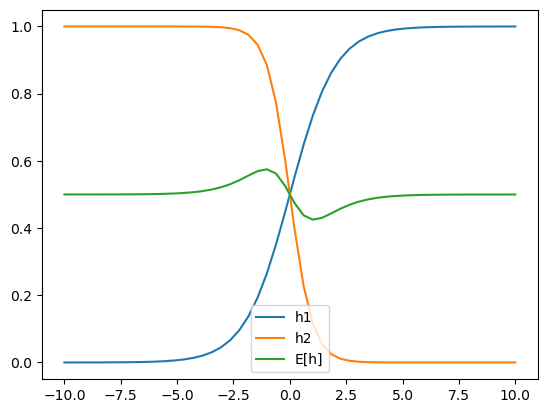

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def theta(s):
    return 1 / (1 + np.exp(-s))

def h1(x0, x1):
    w0 = 0
    w1 = 1
    return theta(w0 * x0 + w1 * x1)

def h2(x0, x1):
    w0 = 0
    w1 = -2
    return theta(w0 * x0 + w1 * x1)

xx = np.linspace(-10, 10)
plt.plot(xx, h1(1, xx))
plt.plot(xx, h2(1, xx))
plt.plot(xx, 1/2 * (h1(1, xx) + h2(1, xx)))
plt.legend(["h1", "h2", "E[h]"])
plt.show()

We can find that the average function of two logistic function is not a logistic function.

## 3 Overfitting

d, Since if there is only one model, we cannot determine overfitting based on one Eout - Ein only.

## 4

d, Stochastic noise does not depend on the hypothesis set.

## 5 Regularization

Since $ w^T_{lin}Γ^T Γ w_{lin} ≤ C $, the regularization term is not affect, so $ w_{reg} = w_{lin} $

## 6 

b, soft-order constraints can be translated into augmented error

## 7 Regularized Linear Regression

In [9]:
data_train = np.loadtxt("features.train")
data_test = np.loadtxt("features.test")
y_train, X_train = data_train[:, :1], data_train[:, 1:]
y_test, X_test = data_test[:, :1], data_test[:, 1:]

In [22]:
data_train

array([[ 6.        ,  0.3410918 , -4.5289375 ],
       [ 5.        ,  0.44413086, -5.4968125 ],
       [ 4.        ,  0.23100195, -2.88675   ],
       ...,
       [ 3.        ,  0.39370508, -2.9211875 ],
       [ 0.        ,  0.59758984, -2.2580625 ],
       [ 1.        ,  0.2762207 , -0.91625   ]])

In [23]:
print(np.mean(data_train[:,2]))  
print(np.max(data_train[:,2]) ) 
print( np.min(data_train[:,2]))

-3.4037785454670146
-0.1195
-7.3266875


In [10]:
from sklearn.linear_model import RidgeClassifier

In [19]:
def get_n_vs_m_dataset(n, m, which='train'):
    if which == "train":
        data = data_train.copy()
    else: 
        data = data_test.copy()
    in_ns = np.isin(data[:,0], n)
    in_ms = np.isin(data[:,0], m)
    in_either = np.logical_or(in_ns, in_ms)
    data[in_ns,0] = +1.0
    data[in_ms,0] = -1.0
    X, y = data[in_either,1:], data[in_either,0]
    return np.hstack([np.ones([X.shape[0], 1]), X]), y

In [37]:
def plot(X, y, clf, s=1):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2], s)
    plt.scatter(X[above,1], X[above,2], s)
    plt.legend(["ms", "ns"])
    plt.xlabel("Intensity")
    plt.ylabel("Symmetry")
    
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Create a grid of points within the plot's limits
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Predict the labels for the grid points
    X1 = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])
    X1 = X1.reshape(xx.shape)

    # Plot the decision boundary
    plt.contour(xx, yy, X1, levels=[0], colors='k', linestyles='dashed')

    plt.show()

In [38]:
def in_sample_error(ns, ms):
    X, y = get_n_vs_m_dataset(ns, ms, "train")
    Z = X # = (1, x1, x2)
    clf = RidgeClassifier(alpha=1.0, fit_intercept=False)
    clf.fit(Z, y)
    #plot_decision_boundary(clf)
    plot(X, y, clf)
    plt.show()
    return np.mean(clf.predict(Z) != y)

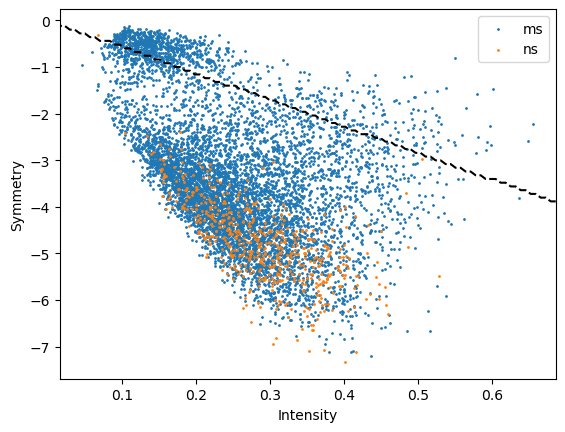

0.07625840076807022


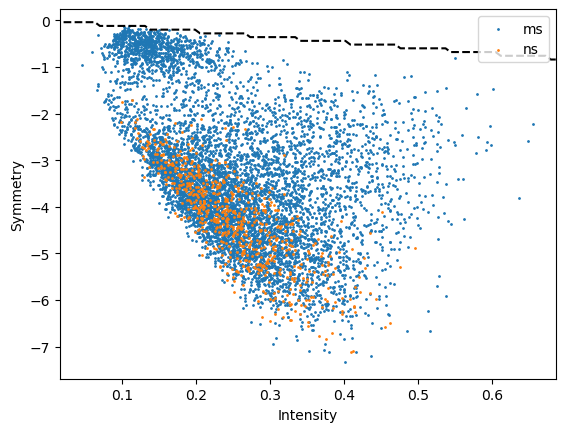

0.09107118365107666


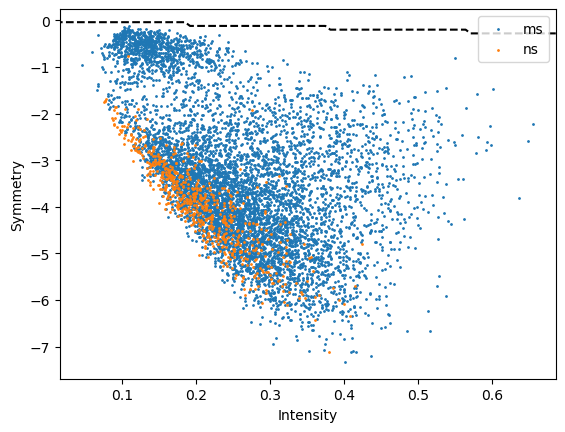

0.08846523110684405


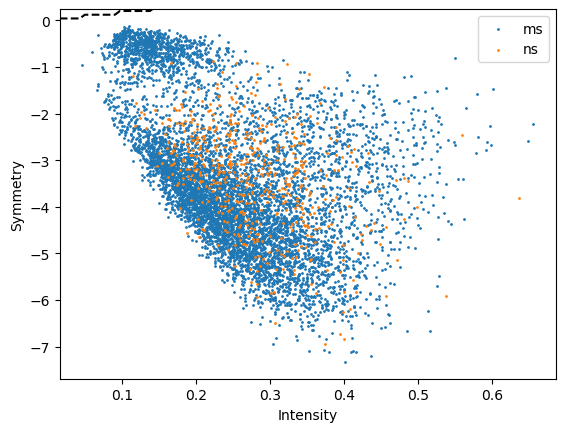

0.07433822520916199


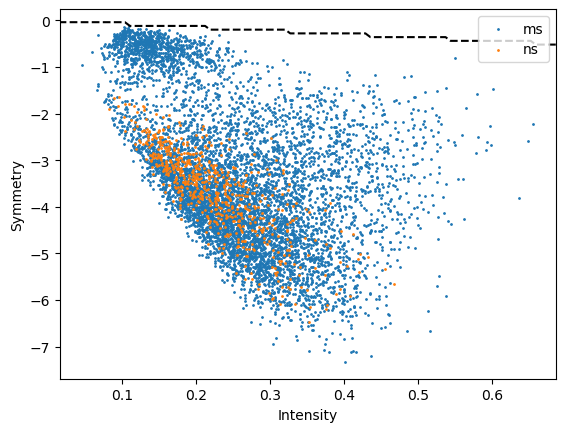

0.08832807570977919


In [39]:

print(in_sample_error([5], [0, 1, 2, 3, 4, 6, 7, 8, 9]))
print(in_sample_error([6], [0, 1, 2, 3, 4, 5, 7, 8, 9]))
print(in_sample_error([7], [0, 1, 2, 3, 4, 5, 6, 8, 9]))
print(in_sample_error([8], [0, 1, 2, 3, 4, 5, 6, 7, 9]))
print(in_sample_error([9], [0, 1, 2, 3, 4, 5, 6, 7, 8]))

 We can see that all of the model is not ideal, although 8 versus all has the lowest Ein

## 8

In [48]:
def phi(X):
    Z = np.zeros((X.shape[0], 7))
    Z[:,0] = 1
    Z[:,1] = 1
    Z[:,2] = X[:,1]
    Z[:,3] = X[:,2]
    Z[:,4] = X[:,1]*X[:,2]
    Z[:,5] = X[:,1]**2
    Z[:,6] = X[:,2]**2
    return Z

In [49]:
def plot1(X, y, s=1):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2], s)
    plt.scatter(X[above,1], X[above,2], s)
    plt.legend(["ms", "ns"])
    plt.xlabel("Intensity")
    plt.ylabel("Symmetry")

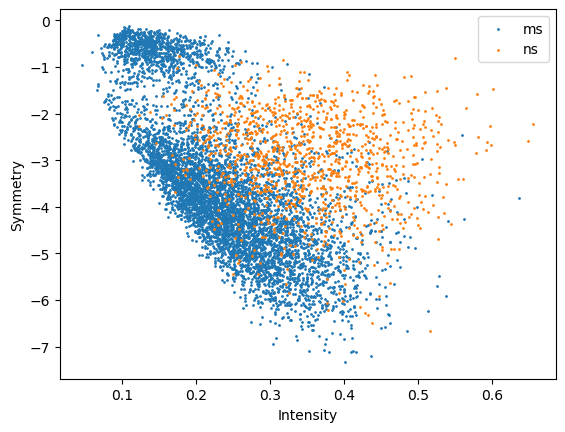

0 vs all Eout 0.10662680617837568


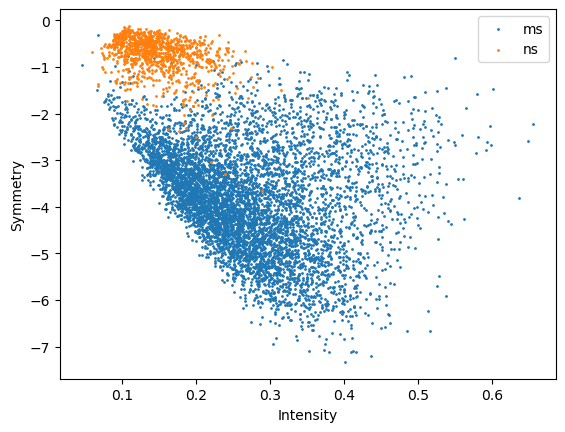

1 vs all Eout 0.02192326856003986


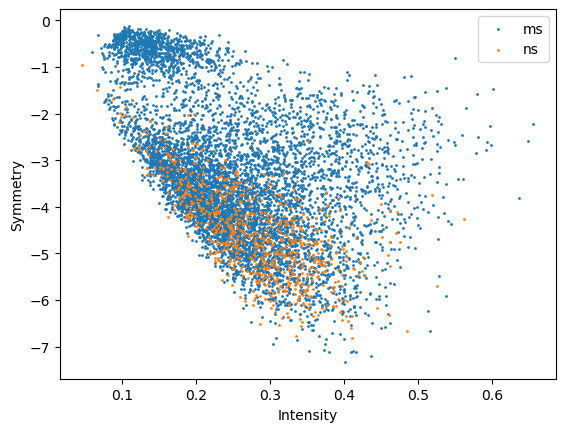

2 vs all Eout 0.09865470852017937


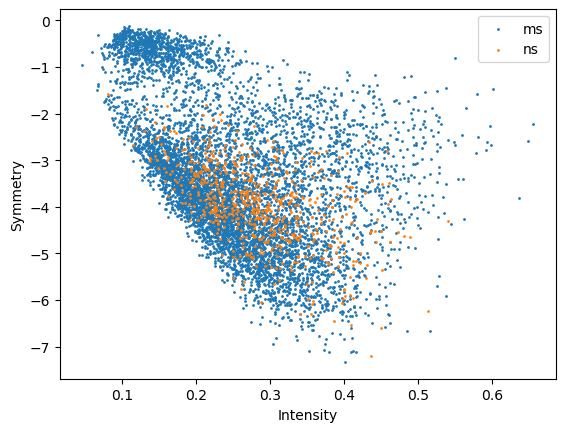

3 vs all Eout 0.08271051320378675


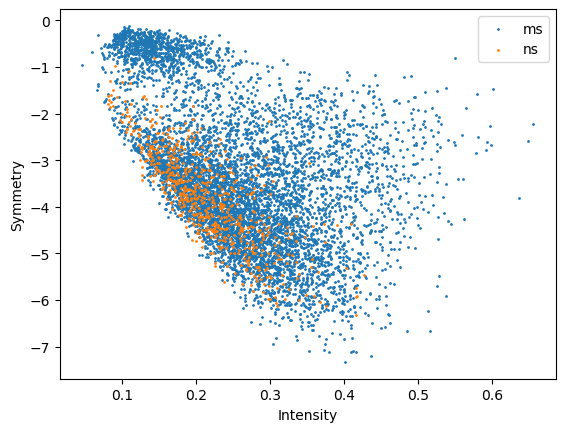

4 vs all Eout 0.09965122072745392


In [50]:
def out_of_sample_error(ns, ms):
    X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
    X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")
    
    Z_train = phi(X_train)
    Z_test = phi(X_test)

    clf = RidgeClassifier(alpha=1, fit_intercept=False)
    clf.fit(Z_train, y_train)
    #plot_decision_boundary2(clf, phi)
    plot1(X_train, y_train)
    plt.show()
    return np.mean(clf.predict(Z_test) != y_test)
    
print("0 vs all Eout", out_of_sample_error([0], [1, 2, 3, 4, 5, 6, 7, 8, 9]))
print("1 vs all Eout", out_of_sample_error([1], [0, 2, 3, 4, 5, 6, 7, 8, 9]))
print("2 vs all Eout", out_of_sample_error([2], [0, 1, 3, 4, 5, 6, 7, 8, 9]))
print("3 vs all Eout", out_of_sample_error([3], [0, 1, 2, 4, 5, 6, 7, 8, 9]))
print("4 vs all Eout", out_of_sample_error([4], [0, 1, 2, 3, 5, 6, 7, 8, 9]))

1 versus all has the lowest Eout

## 9

In [51]:
def check_all(ns, ms):
    print("{} vs all".format(ns[0]))
    X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
    X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")
    
    Z_train = phi(X_train)
    Z_test = phi(X_test)
    
    clf = RidgeClassifier(alpha=1, fit_intercept=False)

    # No transform E_in
    clf.fit(X_train, y_train)
    print("  No transform E_in\t", np.mean(clf.predict(X_train) != y_train))
    # No transform E_out
    print("  No transform E_out\t", np.mean(clf.predict(X_test) != y_test))
    # Transform E_in
    clf.fit(Z_train, y_train)
    print("     Transform E_in\t", np.mean(clf.predict(Z_train) != y_train))
    # Transform E_out
    print("     Transform E_out\t", np.mean(clf.predict(Z_test) != y_test))

check_all([1], [0, 2, 3, 4, 5, 6, 7, 8, 9])
check_all([2], [0, 1, 3, 4, 5, 6, 7, 8, 9])
check_all([3], [0, 1, 2, 4, 5, 6, 7, 8, 9])
check_all([4], [0, 1, 2, 3, 5, 6, 7, 8, 9])
check_all([5], [0, 1, 2, 3, 4, 6, 7, 8, 9])
check_all([6], [0, 1, 2, 3, 4, 5, 7, 8, 9])
check_all([7], [0, 1, 2, 3, 4, 5, 6, 8, 9])
check_all([8], [0, 1, 2, 3, 4, 5, 6, 7, 9])
check_all([9], [0, 1, 2, 3, 4, 5, 6, 7, 8])

1 vs all
  No transform E_in	 0.01522424907420107
  No transform E_out	 0.02242152466367713
     Transform E_in	 0.012343985735838706
     Transform E_out	 0.02192326856003986
2 vs all
  No transform E_in	 0.10026059525442327
  No transform E_out	 0.09865470852017937
     Transform E_in	 0.10026059525442327
     Transform E_out	 0.09865470852017937
3 vs all
  No transform E_in	 0.09024825126868742
  No transform E_out	 0.08271051320378675
     Transform E_in	 0.09024825126868742
     Transform E_out	 0.08271051320378675
4 vs all
  No transform E_in	 0.08942531888629818
  No transform E_out	 0.09965122072745392
     Transform E_in	 0.08942531888629818
     Transform E_out	 0.09965122072745392
5 vs all
  No transform E_in	 0.07625840076807022
  No transform E_out	 0.07972097658196313
     Transform E_in	 0.07625840076807022
     Transform E_out	 0.07922272047832586
6 vs all
  No transform E_in	 0.09107118365107666
  No transform E_out	 0.08470353761833582
     Transform E_in	 0.091071183

So the answer is e

## 10

In [52]:
ns = [5]
ms = [1]
print("1 vs 5")

X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")

Z_train = phi(X_train)
Z_test = phi(X_test)


print("lambda=1")
clf = RidgeClassifier(alpha=1, fit_intercept=False)

# Transform E_in
clf.fit(Z_train, y_train)
print("     Transform E_in\t", np.mean(clf.predict(Z_train) != y_train))
# Transform E_out
print("     Transform E_out\t", np.mean(clf.predict(Z_test) != y_test))


# plot_decision_boundary2(clf, phi)
# plot(X_train, y_train)
# plt.title("Training data")
# plt.show()

# plot_decision_boundary2(clf, phi)
# plot(X_test, y_test)
# plt.title("Test data")
# plt.show()


print("lambda=0.01")
clf2 = RidgeClassifier(alpha=0.01, fit_intercept=False)

# Transform E_in
clf2.fit(Z_train, y_train)
print("     Transform E_in\t", np.mean(clf2.predict(Z_train) != y_train))
# Transform E_out
print("     Transform E_out\t", np.mean(clf2.predict(Z_test) != y_test))

# plot_decision_boundary2(clf2, phi)
# plot(X_train, y_train)
# plt.title("Training data")
# plt.show()

# plot_decision_boundary2(clf2, phi)
# plot(X_test, y_test)
# plt.title("Test data")
# plt.show()

1 vs 5
lambda=1
     Transform E_in	 0.005124919923126201
     Transform E_out	 0.025943396226415096
lambda=0.01
     Transform E_in	 0.004484304932735426
     Transform E_out	 0.02830188679245283


Since Ein slightly improved but Eout got worse, it is overfitting.

## 11

In [53]:
X = np.array([
    [1,1,0],
    [1,0,1],
    [1,0,-1],
    [1,-1,0],
    [1,0,2],
    [1,0,-2],
    [1,-2,0],
])

y = np.array([-1, -1, -1, +1, +1, +1, +1])

In [56]:
def phi(X):
    Z = np.zeros((X.shape[0], 3))
    Z[:,0] = 1
    Z[:,1] = X[:,2]**2 - 2*X[:,1] - 1
    Z[:,2] = X[:,1]**2 - 2*X[:,2] + 1
    return Z

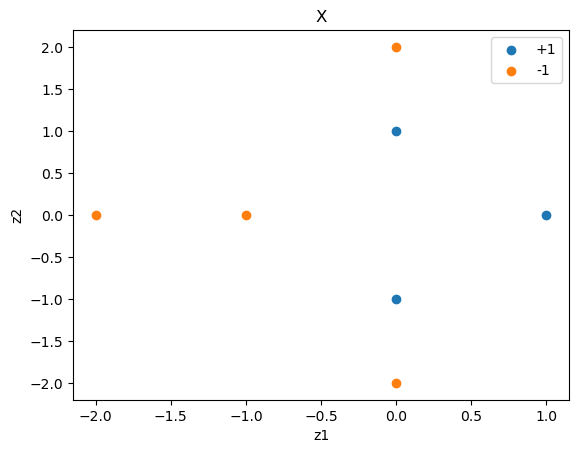

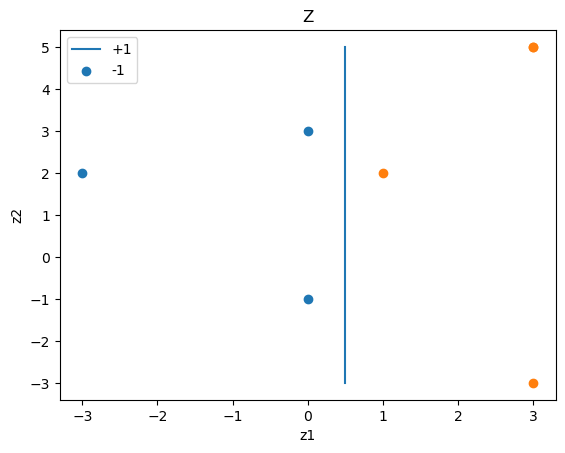

In [58]:
def plot(X, y):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2])
    plt.scatter(X[above,1], X[above,2])
    plt.legend(["+1", "-1"])
    plt.xlabel("z1")
    plt.ylabel("z2")

plt.title("X")
plot(X, y)
plt.show()

Z = phi(X)

plt.title("Z")
plt.plot([0.5, 0.5], [-3, 5])
plot(Z, y)

So the line is like this, with values of w1, w2, b are  1, 0, −0.5

## 12

In [2]:
from sklearn.svm import SVC

In [62]:
clf = SVC(C=100000000000, kernel="poly", degree=2, gamma=1.0, coef0=1.0, verbose=True)
clf.fit(X, y)

[LibSVM]...*..*
optimization finished, #iter = 35
obj = -0.933333, rho = -1.666393
nSV = 5, nBSV = 0
Total nSV = 5


SVC(C=100000000000, coef0=1.0, degree=2, gamma=1.0, kernel='poly', verbose=True)

In [63]:
print("Support vectors", clf.support_vectors_)
print("Alphas", clf.dual_coef_)

Support vectors [[ 1.  0.  1.]
 [ 1.  0. -1.]
 [ 1. -1.  0.]
 [ 1.  0.  2.]
 [ 1.  0. -2.]]
Alphas [[-0.45913763 -0.47406868  0.53326357  0.19623861  0.20370413]]


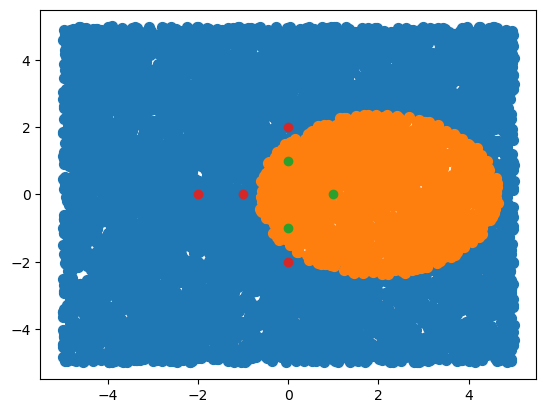

In [64]:
def plot_decision_boundary(clf):
    N = 10000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 10*np.random.rand(N) - 5
    X[:,2] = 10*np.random.rand(N) - 5
    y = clf.predict(X)
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[above,1], X[above,2], s=50)
    plt.scatter(X[below,1], X[below,2], s=50)
    
    
plot_decision_boundary(clf)
above = np.where(y > 0)
below = np.where(y < 0)
plt.scatter(X[below,1], X[below,2])
plt.scatter(X[above,1], X[above,2])
plt.show()

So there are 5 support vectors.

## 13 Radial Basis Functions

In [3]:
def plot_decision_boundary(f):
    N = 1000000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 2*np.random.rand(N) - 1
    X[:,2] = 2*np.random.rand(N) - 1
    y = f(X)
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[above,1], X[above,2], s=70)
    plt.scatter(X[below,1], X[below,2], s=70)

In [4]:
def plot_data(X, y, s=None):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2], s=s)
    plt.scatter(X[above,1], X[above,2], s=s)
    #plt.legend(['above', 'below'])

In [5]:
def f(X):
    return np.sign(X[:,2] - X[:,1] + 0.25 * np.sin(np.pi * X[:,1]))

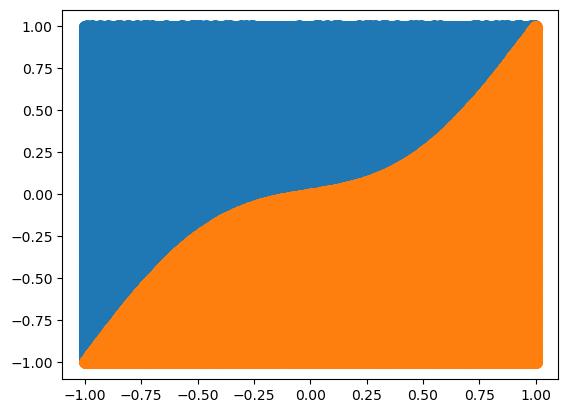

In [6]:
X = 2*np.random.rand(100, 3)-1
X[:,0] = 1
y = f(X)
plot_decision_boundary(f)
plt.show()

[LibSVM]..*...*
optimization finished, #iter = 562
obj = -318.974270, rho = 0.194026
nSV = 11, nBSV = 0
Total nSV = 11


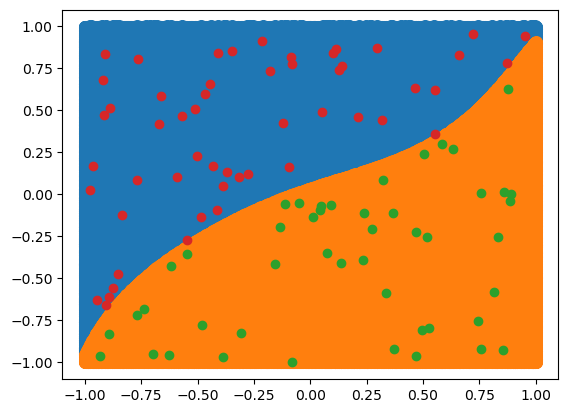

In [9]:
svc = SVC(C=1e5, kernel="rbf", gamma=1.5, verbose=True)
svc.fit(X, y)
plot_decision_boundary(svc.predict)
plot_data(X, y)
plt.show()

In [120]:
len(svc.support_vectors_)

9

In [6]:
def kmeans(X, K):
    while True:
        try:
            mus = 2*np.random.rand(K, 2)-1
            cluster_idx = np.zeros(X.shape[0])
            # Repeat 100 times
            for it in range(100):
                # Find closest cluster for each point
                for i in range(X.shape[0]):
                    cluster_idx[i] = np.argmin(np.linalg.norm(mus - X[i,1:], axis=1))
                # Find average position for each cluster
                for k in range(K):
                    Xk = X[np.where(cluster_idx == k),1:].squeeze()
                    if Xk.shape[0] == 0:
                        raise StopIteration
                    mus[k,:] = np.mean(Xk, axis=0)

            # Check that no centroids are empty
            per_centroid = np.zeros(K)
            for i in range(X.shape[0]):
                cluster_idx[i] = np.argmin(np.linalg.norm(mus - X[i,1:], axis=1))
            for k in range(K):
                per_centroid = np.sum(cluster_idx == k)
            if np.any(per_centroid == 0):
                continue
            return mus
        except StopIteration as e:
            pass # A cluster was empty -- try again

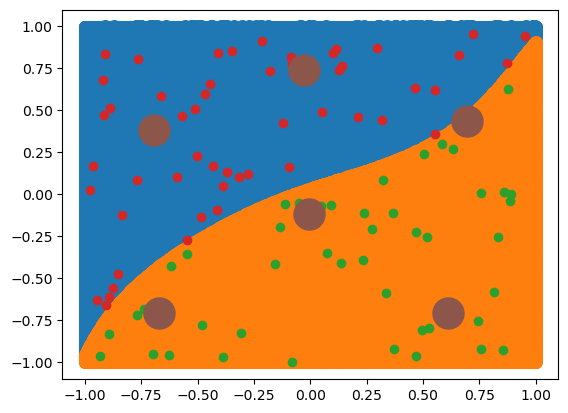

In [10]:
K = 6
plot_decision_boundary(svc.predict)
plot_data(X, y)
plot_data(np.hstack([np.ones([K,1]), kmeans(X, K)]), np.ones(K), s=500)
plt.show()

In [123]:
yes = 0
no = 0
for i in range(10000):
    X = 2*np.random.rand(100, 3)-1
    X[:,0] = 1
    y = f(X)
    svc = SVC(C=10000000, kernel='rbf', gamma=1.5)
    svc.fit(X, y)
    E_in = np.mean(svc.predict(X) != y)
    if E_in > 0:
        no+=1
    else:
        yes+=1
print(yes, no, no/10000)

10000 0 0.0


Unbelivevable! 0 itmes

## 14

In [7]:
class RegularRBF:
    def __init__(self, K, gamma):
        self.K = K
        self.gamma = gamma
    
    def create_phi_matrix(self, X):
        self.centers = kmeans(X, self.K)
        phi = np.zeros((X.shape[0], self.K+1)) # +1 for bias term
        for k in range(self.K):
            dists_to_center = (X[:,1] - self.centers[k,0])**2 + (X[:,2] - self.centers[k,1])**2
            phi[:,k+1] = dists_to_center
        phi = np.exp(-self.gamma * phi)
        phi[:,0] = 1 # For bias term
        return phi
    
    def fit(self, X, y):
        phi = self.create_phi_matrix(X)
        self.w = np.linalg.lstsq(phi, y, rcond=None)[0]
    
    def predict(self, X):
        # sign ( sum_k wk exp(-gamma*||x - muk||^2) + b)
        S = np.zeros(X.shape[0]) # One row for each test point
        for k in range(self.K):
            dists = np.linalg.norm(X[:,1:] - self.centers[k,:], axis=1)**2 # to center_k
            S += self.w[k+1]*np.exp(-self.gamma*dists)
        return np.sign(S+self.w[0]) # add bias term

In [8]:
total_wins = 0
kernel_wins = 0

for i in range(100):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(1000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    svc = SVC(C=1e8, kernel="rbf", gamma=1.5, verbose=False)
    svc.fit(X_train, y_train)
    svc_E_in = np.mean(svc.predict(X_train) != y_train)
    svc_E_out = np.mean(svc.predict(X_test) != y_test)

    
    rbf = RegularRBF(K=9, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)        
    rbf_E_out = np.mean(rbf.predict(X_test) != y_test)
    
    print("SVC: {}/{},  RBF: {}/{}".format(
        svc_E_in, svc_E_out,
        rbf_E_in, rbf_E_out,
    ))
    
    total_wins += 1
    if svc_E_out < rbf_E_out:
        kernel_wins += 1
print(kernel_wins / total_wins * 100, "%")


SVC: 0.0/0.034,  RBF: 0.04/0.038
SVC: 0.0/0.032,  RBF: 0.03/0.073
SVC: 0.0/0.024,  RBF: 0.02/0.046
SVC: 0.0/0.022,  RBF: 0.06/0.056
SVC: 0.0/0.03,  RBF: 0.01/0.052
SVC: 0.0/0.021,  RBF: 0.02/0.045
SVC: 0.0/0.031,  RBF: 0.04/0.058
SVC: 0.0/0.017,  RBF: 0.05/0.053
SVC: 0.0/0.024,  RBF: 0.02/0.049
SVC: 0.0/0.033,  RBF: 0.01/0.065
SVC: 0.0/0.049,  RBF: 0.05/0.056
SVC: 0.0/0.018,  RBF: 0.05/0.078
SVC: 0.0/0.032,  RBF: 0.02/0.063
SVC: 0.0/0.029,  RBF: 0.02/0.055
SVC: 0.0/0.069,  RBF: 0.01/0.061
SVC: 0.0/0.028,  RBF: 0.01/0.034
SVC: 0.0/0.022,  RBF: 0.05/0.046
SVC: 0.0/0.018,  RBF: 0.03/0.06
SVC: 0.0/0.025,  RBF: 0.03/0.03
SVC: 0.0/0.031,  RBF: 0.03/0.069
SVC: 0.0/0.043,  RBF: 0.01/0.061
SVC: 0.0/0.034,  RBF: 0.02/0.047
SVC: 0.0/0.033,  RBF: 0.02/0.041
SVC: 0.0/0.053,  RBF: 0.02/0.076
SVC: 0.0/0.032,  RBF: 0.03/0.033
SVC: 0.0/0.055,  RBF: 0.02/0.042
SVC: 0.0/0.034,  RBF: 0.04/0.023
SVC: 0.0/0.034,  RBF: 0.03/0.051
SVC: 0.0/0.018,  RBF: 0.03/0.066
SVC: 0.0/0.023,  RBF: 0.03/0.034
SVC: 0.0/0.08

Kernel form wins about 89% times.

In [10]:
total_wins = 0
kernel_wins = 0

for i in range(100):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(1000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    svc = SVC(C=1e8, kernel="rbf", gamma=1.5, verbose=False)
    svc.fit(X_train, y_train)
    svc_E_in = np.mean(svc.predict(X_train) != y_train)
    svc_E_out = np.mean(svc.predict(X_test) != y_test)

    
    rbf = RegularRBF(K=12, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)        
    rbf_E_out = np.mean(rbf.predict(X_test) != y_test)
    
    print("SVC: {}/{},  RBF: {}/{}".format(
        svc_E_in, svc_E_out,
        rbf_E_in, rbf_E_out,
    ))
    
    total_wins += 1
    if svc_E_out < rbf_E_out:
        kernel_wins += 1
print(kernel_wins / total_wins * 100, "%")


SVC: 0.0/0.028,  RBF: 0.02/0.035
SVC: 0.0/0.051,  RBF: 0.03/0.059
SVC: 0.0/0.027,  RBF: 0.0/0.049
SVC: 0.0/0.036,  RBF: 0.01/0.044
SVC: 0.0/0.013,  RBF: 0.02/0.046
SVC: 0.0/0.037,  RBF: 0.03/0.046
SVC: 0.0/0.048,  RBF: 0.04/0.043
SVC: 0.0/0.012,  RBF: 0.02/0.071
SVC: 0.0/0.028,  RBF: 0.02/0.047
SVC: 0.0/0.02,  RBF: 0.01/0.025
SVC: 0.0/0.022,  RBF: 0.0/0.026
SVC: 0.0/0.023,  RBF: 0.01/0.033
SVC: 0.0/0.046,  RBF: 0.0/0.048
SVC: 0.0/0.026,  RBF: 0.02/0.039
SVC: 0.0/0.01,  RBF: 0.04/0.029
SVC: 0.0/0.018,  RBF: 0.0/0.027
SVC: 0.0/0.047,  RBF: 0.01/0.06
SVC: 0.0/0.029,  RBF: 0.05/0.039
SVC: 0.0/0.035,  RBF: 0.03/0.035
SVC: 0.0/0.03,  RBF: 0.04/0.049
SVC: 0.0/0.025,  RBF: 0.02/0.031
SVC: 0.0/0.035,  RBF: 0.01/0.036
SVC: 0.0/0.016,  RBF: 0.04/0.035
SVC: 0.0/0.048,  RBF: 0.01/0.053
SVC: 0.0/0.032,  RBF: 0.05/0.048
SVC: 0.0/0.031,  RBF: 0.02/0.034
SVC: 0.0/0.028,  RBF: 0.0/0.025
SVC: 0.0/0.013,  RBF: 0.03/0.052
SVC: 0.0/0.029,  RBF: 0.04/0.059
SVC: 0.0/0.033,  RBF: 0.01/0.06
SVC: 0.0/0.026,  RBF

Kernel form wins about 70% times when k=12

## 16

From above we can find that when K larger, both Ein and Eout go down.

## 17

In [12]:
case_a = 0
case_b = 0
case_c = 0
case_d = 0
case_e = 0

for i in range(50):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(10000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    rbf1 = RegularRBF(K=9, gamma=1.5)
    rbf1.fit(X_train, y_train)
    rbf1_E_in = np.mean(rbf1.predict(X_train) != y_train)        
    rbf1_E_out = np.mean(rbf1.predict(X_test) != y_test)
    
    rbf2 = RegularRBF(K=9, gamma=2)
    rbf2.fit(X_train, y_train)
    rbf2_E_in = np.mean(rbf2.predict(X_train) != y_train)        
    rbf2_E_out = np.mean(rbf2.predict(X_test) != y_test)
    
    print("RBF1: {}/{},  RBF2: {}/{}".format(
        rbf1_E_in, rbf1_E_out,
        rbf2_E_in, rbf2_E_out,
    ))
    
    if rbf2_E_in < rbf1_E_in and rbf2_E_out > rbf1_E_out:
        case_a += 1
    if rbf2_E_in > rbf1_E_in and rbf2_E_out < rbf1_E_out:
        case_b += 1
    if rbf2_E_in > rbf1_E_in and rbf2_E_out > rbf1_E_out:
        case_c += 1
    if rbf2_E_in < rbf1_E_in and rbf2_E_out < rbf1_E_out:
        case_d += 1
    if rbf2_E_in == rbf1_E_in and rbf2_E_out == rbf1_E_out:
        case_e += 1
        
print(case_a)
print(case_b)
print(case_c)
print(case_d)
print(case_e)

RBF1: 0.05/0.0546,  RBF2: 0.03/0.056
RBF1: 0.03/0.0625,  RBF2: 0.03/0.0559
RBF1: 0.04/0.0511,  RBF2: 0.06/0.0649
RBF1: 0.05/0.0342,  RBF2: 0.06/0.0793
RBF1: 0.06/0.0491,  RBF2: 0.07/0.0461
RBF1: 0.02/0.0409,  RBF2: 0.06/0.0711
RBF1: 0.01/0.0428,  RBF2: 0.05/0.0457
RBF1: 0.03/0.0582,  RBF2: 0.03/0.0559
RBF1: 0.04/0.0433,  RBF2: 0.04/0.0389
RBF1: 0.03/0.0622,  RBF2: 0.03/0.0561
RBF1: 0.03/0.0293,  RBF2: 0.04/0.0418
RBF1: 0.01/0.0488,  RBF2: 0.06/0.0786
RBF1: 0.04/0.042,  RBF2: 0.02/0.0442
RBF1: 0.04/0.0704,  RBF2: 0.03/0.0385
RBF1: 0.01/0.018,  RBF2: 0.02/0.0272
RBF1: 0.03/0.0615,  RBF2: 0.01/0.0523
RBF1: 0.05/0.0654,  RBF2: 0.05/0.0812
RBF1: 0.0/0.0143,  RBF2: 0.01/0.0157
RBF1: 0.07/0.0586,  RBF2: 0.05/0.0473
RBF1: 0.02/0.0613,  RBF2: 0.04/0.059
RBF1: 0.03/0.0581,  RBF2: 0.05/0.0807
RBF1: 0.07/0.0422,  RBF2: 0.06/0.05
RBF1: 0.02/0.0471,  RBF2: 0.03/0.0329
RBF1: 0.06/0.0518,  RBF2: 0.06/0.0826
RBF1: 0.0/0.073,  RBF2: 0.02/0.0516
RBF1: 0.08/0.0623,  RBF2: 0.04/0.0434
RBF1: 0.0/0.0463,  RB

When gamma goes larger, both Ein and Eout go up.

## 18

In [13]:
times_Ein_zero = 0
times_Ein_positive = 0

for i in range(100):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    rbf = RegularRBF(K=9, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)
    
    if rbf_E_in == 0:
        times_Ein_zero += 1
    else:
        times_Ein_positive += 1
print(times_Ein_zero / (times_Ein_zero + times_Ein_positive))


0.02


Less than 10%, menas most of the time Ein larger than 0.

## 19


To be more precise, if the distribution is uniform on the interval [0, 1], the density function P(h) should be equal to 1 for all h in this interval, because the total probability across the entire space should be 1.

Let's correct the explanation with this in mind:

Given the prior distribution for h is uniform over [0, 1], the density function P(h) is equal to 1 for all h in [0, 1].

Now, according to Bayes' theorem:

P(h|D) = P(D|h)P(h) / P(D)

P(D|h) = h (since h represents the probability of getting a heart attack).
P(h) = 1 (as it's uniform over [0, 1]).

P(D) is the total probability of a randomly selected person having a heart attack and can be computed as:

P(D) = ∫ P(D|h)P(h) dh (from 0 to 1) = ∫ h * 1 dh (from 0 to 1) = [h^2/2] (from 0 to 1) = 1/2

Now, plug this back into the expression for P(h|D):

P(h|D) = h * 1 / (1/2) = 2h

This confirms that P(h|D) increases linearly over h ∈ [0, 1].

## 20

By using cauchy schwarz inequality, we can find that c is correct.